# 对数变换

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [6]:
# 例2-6 对数变换前后的点评数量分布可视化
biz_file = open('data/yelp_academic_dataset_business.json')  # 这个应该是用原始数据所创建的一个规模小得多的分类数据集吧
# 原始数据集：160万条点评和61184个商家

biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()
print(biz_df['review_count'].sort_values().head())  # 最少评论数为3
print(biz_df['review_count'].min())

0       3
8814    3
8807    3
8806    3
8805    3
Name: review_count, dtype: int64
3


In [11]:
biz_df['review_count']

0         3
1         5
2         4
3         5
4        14
         ..
11532    18
11533    25
11534     3
11535    23
11536    11
Name: review_count, Length: 11537, dtype: int64

In [12]:
print(type(biz_df['review_count']))

<class 'pandas.core.series.Series'>


In [13]:
biz_df[['review_count']]

,review_count
0,3
1,5
2,4
3,5
4,14
...,...
11532,18
11533,25
11534,3
11535,23


In [14]:
print(type(biz_df[['review_count']]))

<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Occurrence')

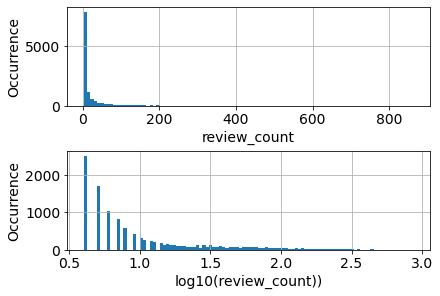

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)  # 为什么要加1呢？是为了防止点评数为0，对数运算结果负无穷大
biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

C:\Users\waitp\AppData\Local\Temp\ipykernel_25060\3269553431.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("data/OnlineNewsPopularity.csv", delimiter=', ')  # Mashable网站发表的近四万篇新闻文章，时间跨度两年，共有60个特征


(39644, 61)


Text(0, 0.5, 'Number of Articles')

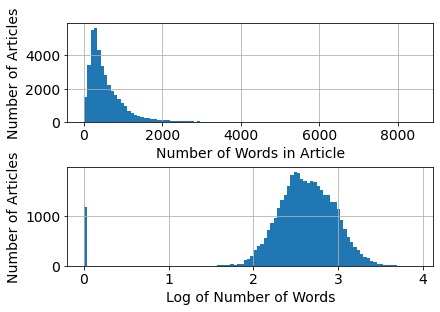

In [4]:
# 例2-7 新闻文章流行度分布的可视化，使用对数变换和不使用对数变换（此例中只重点研究文章中的单词个数）
df = pd.read_csv("data/OnlineNewsPopularity.csv", delimiter=', ')  # Mashable网站发表的近四万篇新闻文章，时间跨度两年，共有60个特征
print(df.shape)

fig1, (ax3, ax4) = plt.subplots(2, 1, constrained_layout=True)

df['n_tokens_content'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Number of Words in Article', fontsize=14)
ax3.set_ylabel('Number of Articles', fontsize=14)

# 在对数变换之后，特征分布更像是高斯分布了（0即无内容文章的数量有一个突变）
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)  # 对数变换
df['log_n_tokens_content'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('Log of Number of Words', fontsize=14)
ax4.set_ylabel('Number of Articles', fontsize=14)

# 对数变换实战

In [17]:
# 例2-8 Yelp点评数据集：使用点评数量来预测一个商家的平均评分（连续型数值）
# 线性回归
# 10折交叉验证
# 使用R方？分数来评价模型——衡量训练出的回归模型预测新数据的能力
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# 为了单独cell运行方便，把需要用到的之前代码copy了过来
biz_file = open('data/yelp_academic_dataset_business.json')  # 这个应该是用原始数据所创建的一个规模小得多的分类数据集吧
# 原始数据集：160万条点评和61184个商家

biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])  # .json格式文件的处理，类似列表生成式
biz_file.close()

# 对数变换
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)  # 为什么要加1呢？是为了防止点评数为0，对数运算结果负无穷大

# Train linear regression models to predict the average stars rating of a business,
# using the review_count feature with and without log transformation
# Compare the 10-fold cross validation score of the two models
m_orig = linear_model.LinearRegression()  # 实例化模型对象
# 注意第二个参数与第三个参数的不同，第二个参数类型在这里必须是DataFrame
scores_orig = cross_val_score(m_orig, biz_df[['review_count']],
                              biz_df['stars'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']],
                              biz_df['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00215 (+/- 0.00329)
R-squared score with log transform: 0.00136 (+/- 0.00328)


In [18]:
# 例2-9 Mashable新闻文章数据集：使用文章中的单词数量来预测文章流行度（连续型数值）
df = pd.read_csv("data/OnlineNewsPopularity.csv", delimiter=', ')

df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)  # 对数变换

# 训练两个线性回归模型来预测文章的分享数
news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, df[['n_tokens_content']], df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, df[['log_n_tokens_content']], df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))
# 置信区间还是重叠在一起？

C:\Users\waitp\AppData\Local\Temp\ipykernel_25060\1690143203.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("data/OnlineNewsPopularity.csv", delimiter=', ')


R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


# 数据可视化-得到一些解释

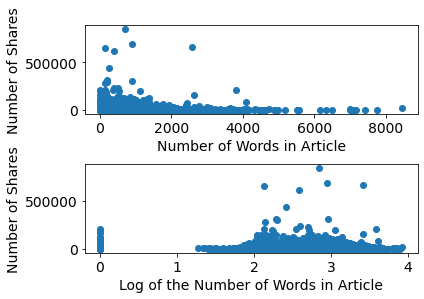

In [23]:
# 例2-10 新闻流行度预测问题中输入和输出相关性的可视化
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)
plt.tight_layout()

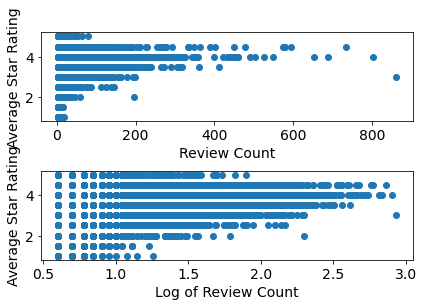

In [24]:
# 例2-11 Yelp商家点评预测中的输入和输出相关性可视化
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)
plt.tight_layout()
